In [31]:
import math
from sys.info import simdwidthof
from algorithm import vectorize
from python import Python

def main():

    alias size = 256
    alias vtype = DType.float64

    var array = DTypePointer[vtype]().alloc(size)
    @parameter
    fn cosine[group_size : Int](X : Int):
        var tmp = math.iota[vtype, group_size](X)
        tmp = tmp * 3.14 * 2 / 256.0
        tmp = math.cos[vtype, group_size](tmp)
        array.simd_store(X, tmp)

    alias by_group_of = simdwidthof[vtype]() 
    vectorize[by_group_of,cosine](size)

    for i in range(size):
        print(array.load(i))
    
    try:
        var plt = Python.import_module("matplotlib.pyplot")
        var python_y_array = PythonObject([])
        for i in range(size):
            python_y_array.append(array.load(i))
        var python_x_array = Python.evaluate("[x for x in range(256)]")
        plt.plot(python_x_array,python_y_array)
        plt.show()
    except:
        print("no plot")
    
    #release memory
    array.free()

1.0
0.99969912397565974
0.99879667695540308
0.99729320198857307
0.99518960379431143
0.99248714821714101
0.98918746146524184
0.98529252913187693
0.98080469500055723
0.97572665963466554
0.97006147875238646
0.96381256138792215
0.95698366784009858
0.94957890740959849
0.94160273592618093
0.93305995306737655
0.92395569947027212
0.91429545363812148
0.90408502864364482
0.89333056863100047
0.88203854511853352
0.87021575310452626
0.85786930697829433
0.84500663623908812
0.83163548102537632
0.81776388745720219
0.80340020279441371
0.78855307041368339
0.77323142460733829
0.7574444852071317
0.74120175203618988
0.72451299919247469
0.70738826916719977
0.68983786680174086
0.6718723530866767
0.65350253880669085
0.63473947803516018
0.61559446148234342
0.59607900970117322
0.57620486615473998
0.55598399014963851
0.53542854963943076
0.5145509139025557
0.49336364609908906
0.47187949571083804
0.45011139086931251
0.42807243057619715
0.40577587682099869
0.38323514660061825
0.36046380384564436
0.33747555125823137

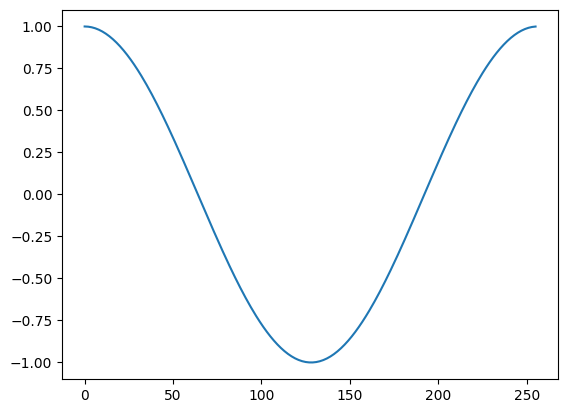

In [32]:
main()